# Lab: Feature Engineering and Polynomial Regression

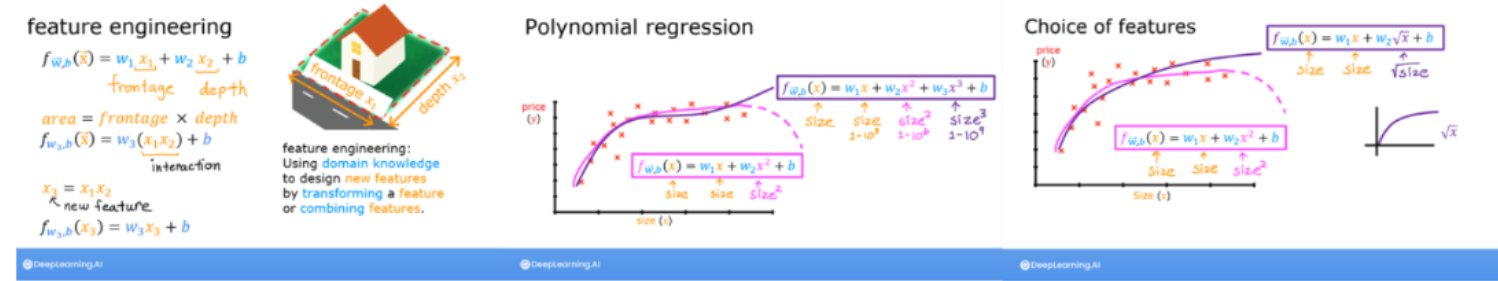

**Goals :**


explore feature engineering and polynomial regression which allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.

# Tools

In [24]:
#  Change the current working directory so that Python can directly access the local utility modules in this folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms

/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

# Feature Engineering and Polynomial Regression Overview

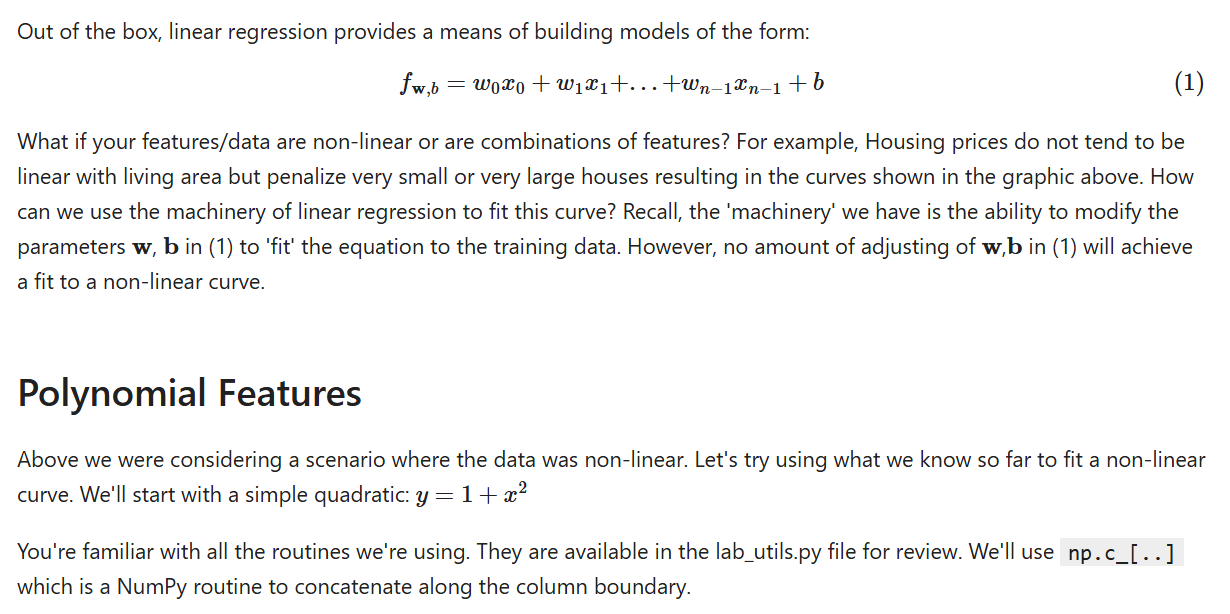

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


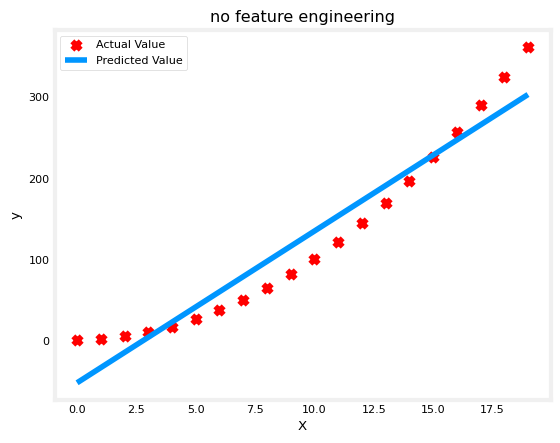

In [26]:
# create target data
x = np.arange(0,20,1)
y = 1 + x**2 # quadratic
X=x.reshape(-1,1)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

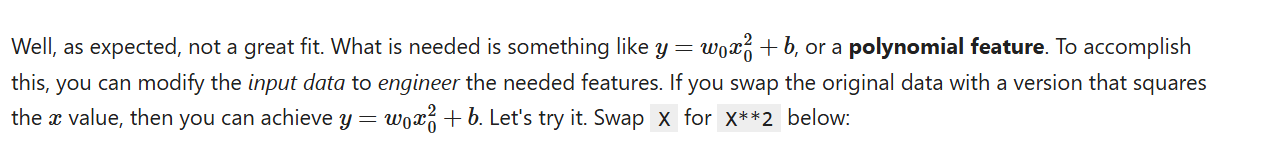

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


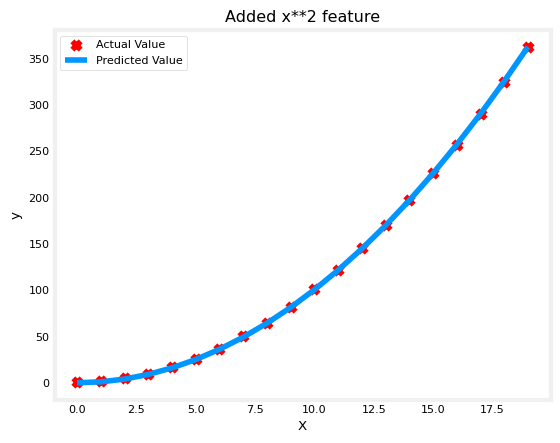

In [27]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features
X = x**2   #<-- added engineered feature
X = X.reshape(-1, 1)  #X should be a 2-D Matrix


model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

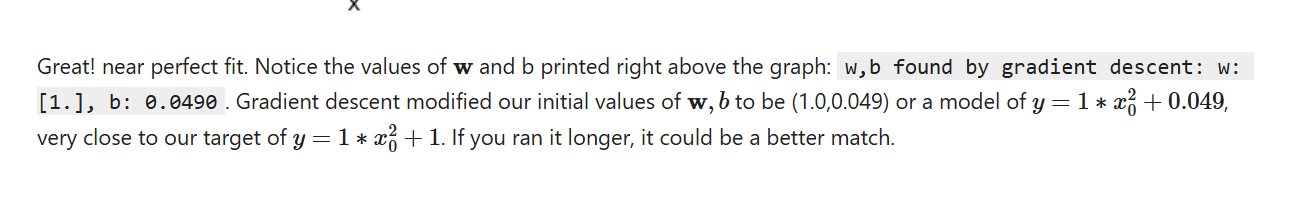

# Selecting Features

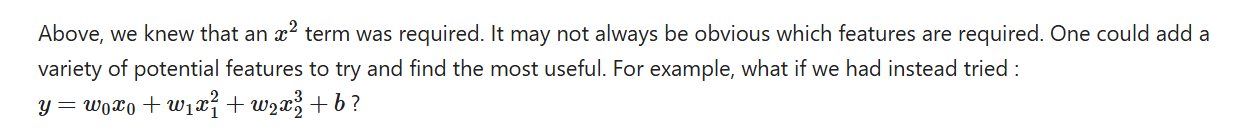

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


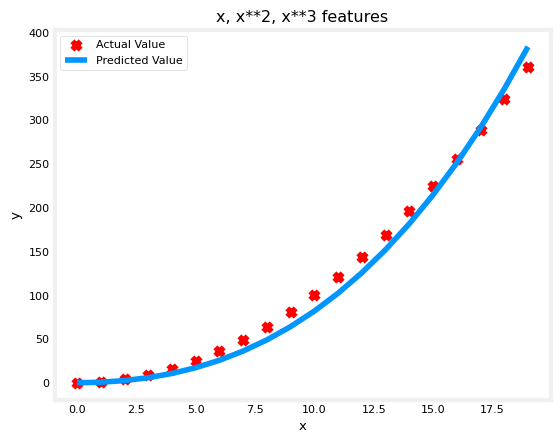

In [29]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# An Alternate View

Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example.

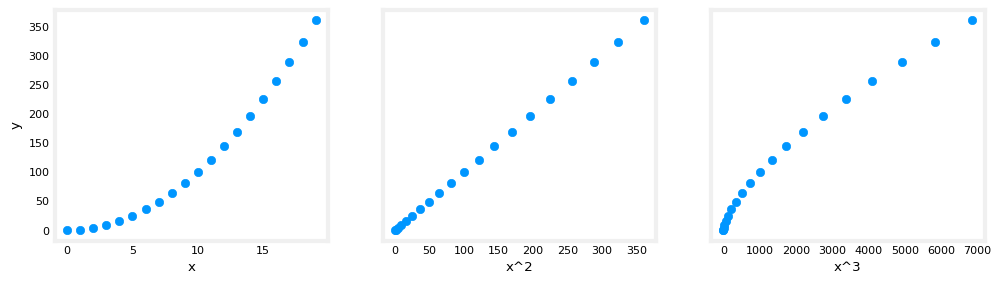

In [30]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']


fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

# Scaling features

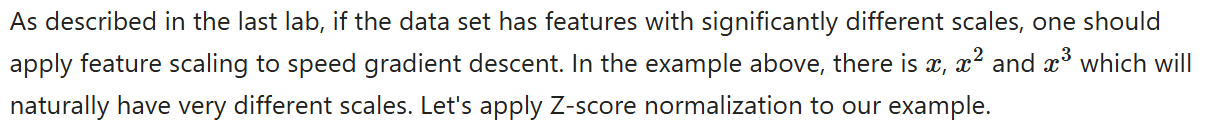

In [32]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]



Now we can try again with a more aggressive value of alpha:

Iteration         0, Cost: 9.42147e+03
Iteration      1000, Cost: 4.21521e+00
Iteration      2000, Cost: 3.23649e+00
Iteration      3000, Cost: 2.48501e+00
Iteration      4000, Cost: 1.90802e+00
Iteration      5000, Cost: 1.46500e+00
Iteration      6000, Cost: 1.12484e+00
Iteration      7000, Cost: 8.63665e-01
Iteration      8000, Cost: 6.63131e-01
Iteration      9000, Cost: 5.09160e-01
w,b found by gradient descent: w: [ 7.67 93.95 12.29], b: 123.5000


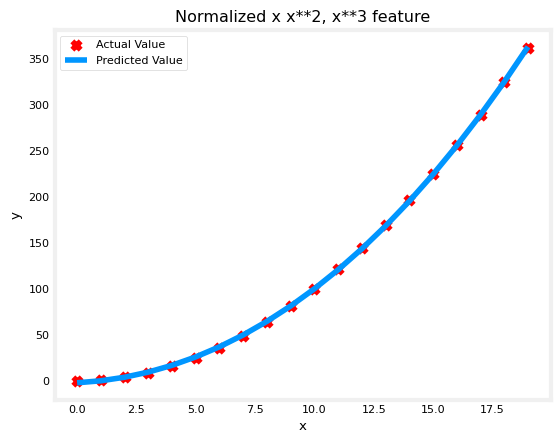

In [39]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)


model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Complex Functions

With feature engineering, even quite complex functions can be modeled:

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


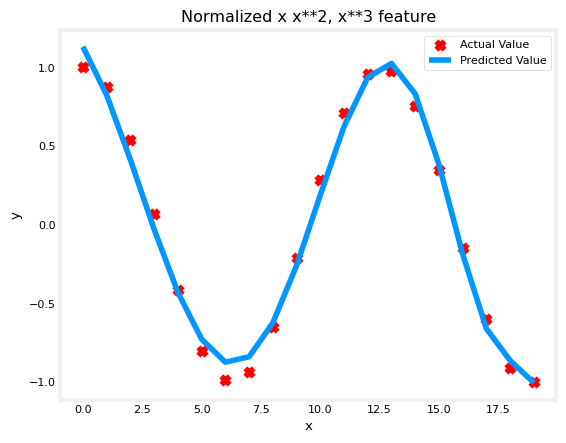

In [45]:

x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 0.1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


# Congratulations!
In this lab we:

*   learned how linear regression can model complex, even highly non-linear functions using feature engineering
*   recognized that it is important to apply feature scaling when doing feature engineering